In [32]:
import a2_1 as a1
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
from tqdm import tqdm
from scipy import stats
from astropy.stats import kuiper

/net/student50/data1/MRP1/numerical_recipes/a2/a2_1.py:22: RuntimeWarning: overflow encountered in long_scalars
  self.state = self.a*(x&(2**32-1))+(x>>32)


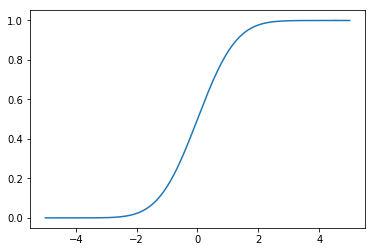

1000


ValueError: operands could not be broadcast together with shapes (1000,) (10,) 

In [67]:
reload(a1)
seed = 627310980
rng = a1.rng(seed)
mu,sig = 0,1
N = 1000
rand = a1.box_muller(rng.rand_num(N),rng.rand_num(N),mu,sig)
gauss = lambda x : 1/(2*np.pi*sig**2)**0.5*np.exp(-0.5*(x-mu)**2/sig**2)
n = np.logspace(np.log10(10),np.log10(1000),dtype=int)

x = np.linspace(mu-5*sig,mu+5*sig,1000)

gauss_cdf_precal = np.zeros(len(x))
#print(n[-1])
for i in range(len(x)):
    gauss_cdf_precal[i] = a1.romber_int(gauss,x[0],x[i])

gauss_cdf = lambda x: gauss_cdf_precal

plt.plot(x,gauss_cdf_precal)
plt.show()
    
kuip_P,kuip_P_s = np.zeros(len(n)),np.zeros(len(n)) 
kuip_d,kuip_d_s = np.zeros(len(n)),np.zeros(len(n))
# Running test for different values of N

rand_bm = a1.box_muller(rng.rand_num(n[-1]),rng.rand_num(n[-1]),mu,sig)   
print(len(rand_bm[0]))
for i in range(len(n)):
    rand = rand_bm[0][:n[i]]
    kuip_d[i],kuip_P[i] = a1.KS_Kuip_test(rand,gauss,mu,sig,Kuip=True)
    kuip_d_s[i],kuip_P_s[i] = kuiper(rand,gauss_cdf)
# Plotting
plt.plot(n,kuip_P_s,label='Scipy')
plt.plot(n,kuip_P,label='Self written')
plt.title('Scipy KS-Test and self-written Kuiper-Test')
plt.ylabel('$P(z)$')
plt.xlabel('N')
plt.xscale('log')
plt.legend(loc = 'upper right',frameon=False)
plt.show()

In [ ]:
seed = 627310980
rng = a1.rng(seed)
N = 1000
mu, sig = 0,1

gauss = lambda x : 1/(2*np.pi*sig**2)**0.5*np.exp(-0.5*(x-mu)**2/sig**2)

reload(a1)

kuip_P,kuip_P_s = np.zeros(len(n)),np.zeros(len(n)) 

filename = 'randomnumbers.txt'
url = 'https://home.strw.leidenuniv.nl/~nobels/coursedata/'

if not os.path.isfile(filename):
    print(f'File not found, downloading {filename}')
    os.system('wget '+url+filename)
rand_num = np.genfromtxt(filename,delimiter=' ',skip_footer=1)
N = len(random_num)
rand_bm = a1.box_muller(rng.rand_num(N),rng.rand_num(N),mu,sig)

n = np.logspace(np.log10(10),np.log10(1000),dtype=int)
#test_P,test_D = np.zeros((10,len(n)),dtype=list),np.zeros((10,len(n)),dtype=list)
# Applying KS-test 
for i in tqdm(range(10)):
    for j in range(len(n)):
        rand_num_select = np.array(rand_num[:n[j],i])
        rand_bm_select = np.array (rand_bm[0][:n[j]])
        #print(len(rand_num_select),len(rand_bm_select))
        test_D[i][j],test_P[i][j] = a1.Ks_test_2s(rand_bm_select,rand_num_select,mu,sig)
        
# Plotting
#plt.plot(n,kuip_P_s,label='Scipy (KS)',color = 'g')
for i in range(10):
    plt.plot(n,test_P[i],label = i)
plt.title('Scipy KS-Test and self-written Kuiper-Test')
plt.ylabel('$P(z)$')
plt.xlabel('N')
plt.xscale('log')
plt.legend(loc=2, bbox_to_anchor=(1,1))
#plt.savefig('plots/1g.png')
#plt.close()
plt.show()
print('Generated plots/1g.png')

99999
(99999,)


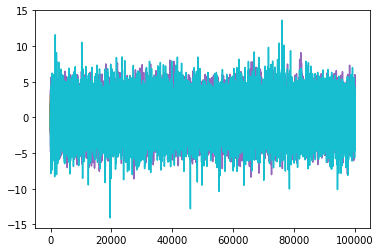

In [41]:
print(len(rand_num))
print(np.array(rand_bm[0]).shape)
plt.plot(random_num)
plt.show()

In [51]:
x = np.array([1,2,3,4,5,6])
print(len(x[x<=3]))

3
